In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
train_dir="/kaggle/input/signature-verification-dataset/sign_data/train/"
test_dir="/kaggle/input/signature-verification-dataset/sign_data/test/"

In [3]:
size = 100

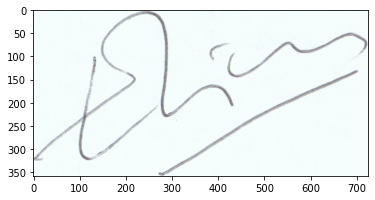

In [4]:
import matplotlib.pyplot as plt
img = plt.imread('../input/signature-verification-dataset/sign_data/train/001/001_01.PNG')
plt.imshow(img)

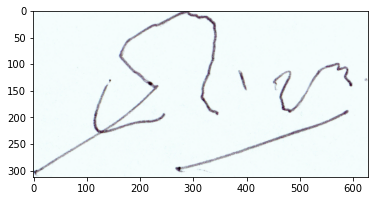

In [5]:
img1 = plt.imread('../input/signature-verification-dataset/sign_data/train/001_forg/0119001_01.png')
plt.imshow(img1)

In [7]:
import cv2
import os
import glob

train_data = []
train_labels = []

for per in os.listdir('../input/signature-verification-dataset/sign_data/train/'):
    for data in glob.glob('../input/signature-verification-dataset/sign_data/train/'+per+'/*.*'):
        img = cv2.imread(data,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (size, size))
        train_data.append([img])
        if per[-1]=='g':
            train_labels.append(np.array(1))
        else:
            train_labels.append(np.array(0))

train_data = np.array(train_data)/255.0
train_labels = np.array(train_labels)

#Test Data

test_data = []
test_labels = []

for per in os.listdir('../input/signature-verification-dataset/sign_data/test/'):
    for data in glob.glob('../input/signature-verification-dataset/sign_data/test/'+per+'/*.*'):
        img = cv2.imread(data,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (size, size))
        test_data.append([img])
        if per[-1]=='g':
            test_labels.append(1)
        else:
            test_labels.append(0)

test_data = np.array(test_data)/255.0
test_labels = np.array(test_labels)

In [8]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)

In [9]:
train_labels

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [10]:
train_data.shape

(1649, 1, 100, 100)

In [11]:
train_data = train_data.reshape(-1, size,size, 1)
test_data = test_data.reshape(-1, size,size, 1)

In [12]:
train_data.shape

(1649, 100, 100, 1)

In [13]:
from sklearn.utils import shuffle
train_data,train_labels = shuffle(train_data,train_labels)
test_data,test_labels = shuffle(test_data,test_labels)

In [14]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from keras_preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix as CM
from keras.optimizers import Adam

network = Sequential()

network.add(Conv2D(64,(3,3),input_shape=(size,size,1),activation='relu'))
network.add(MaxPooling2D(3,3))
network.add(Conv2D(32,(3,3),activation='relu'))
network.add(MaxPooling2D(2,2))
network.add(Flatten())
network.add(Dense(128,activation = 'relu'))
network.add(Dropout(rate=0.3))
network.add(Dense(2,activation = 'softmax'))

network.compile(optimizer=keras.optimizers.Adam(),loss="categorical_crossentropy",metrics=["accuracy"])
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 7200)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               921728    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

In [15]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
earlyStopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1)

early_stop=[earlyStopping]


EPOCHS = 20
BS = 64
progress = network.fit(train_data,train_labels, batch_size=BS,epochs=EPOCHS, callbacks=early_stop,validation_split=.3)

Epoch 1/20
19/19 [==============================] - 0s 25ms/step - loss: 0.6952 - accuracy: 0.5364 - val_loss: 0.6741 - val_accuracy: 0.7475
Epoch 2/20
19/19 [==============================] - 0s 16ms/step - loss: 0.6414 - accuracy: 0.6300 - val_loss: 0.6237 - val_accuracy: 0.5535
Epoch 3/20
19/19 [==============================] - 0s 13ms/step - loss: 0.5292 - accuracy: 0.7513 - val_loss: 0.4370 - val_accuracy: 0.8646
Epoch 4/20
19/19 [==============================] - 0s 14ms/step - loss: 0.4627 - accuracy: 0.8111 - val_loss: 0.3810 - val_accuracy: 0.8545
Epoch 5/20
19/19 [==============================] - 0s 12ms/step - loss: 0.3799 - accuracy: 0.8458 - val_loss: 0.3515 - val_accuracy: 0.9051
Epoch 6/20
19/19 [==============================] - 0s 12ms/step - loss: 0.3523 - accuracy: 0.8466 - val_loss: 0.3177 - val_accuracy: 0.8566
Epoch 7/20
19/19 [==============================] - 0s 12ms/step - loss: 0.3048 - accuracy: 0.8865 - val_loss: 0.2995 - val_accuracy: 0.8545
Epoch 8/20
19

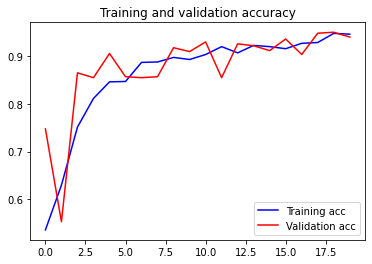

In [16]:
acc = progress.history['accuracy']
val_acc = progress.history['val_accuracy']
loss = progress.history['loss']
val_loss = progress.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.show()

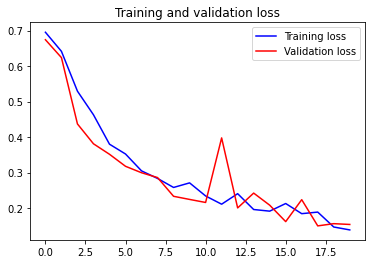

In [17]:
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [18]:
pred = network.predict(test_data)

In [19]:
predict =np.argmax(pred,axis=1)

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(predict , test_labels)

0.962